In [108]:
import numpy as np
import pandas as pd
from pathlib import Path
import tarfile
import urllib.request
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
housing['ocean_proximity'].value_counts(dropna=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

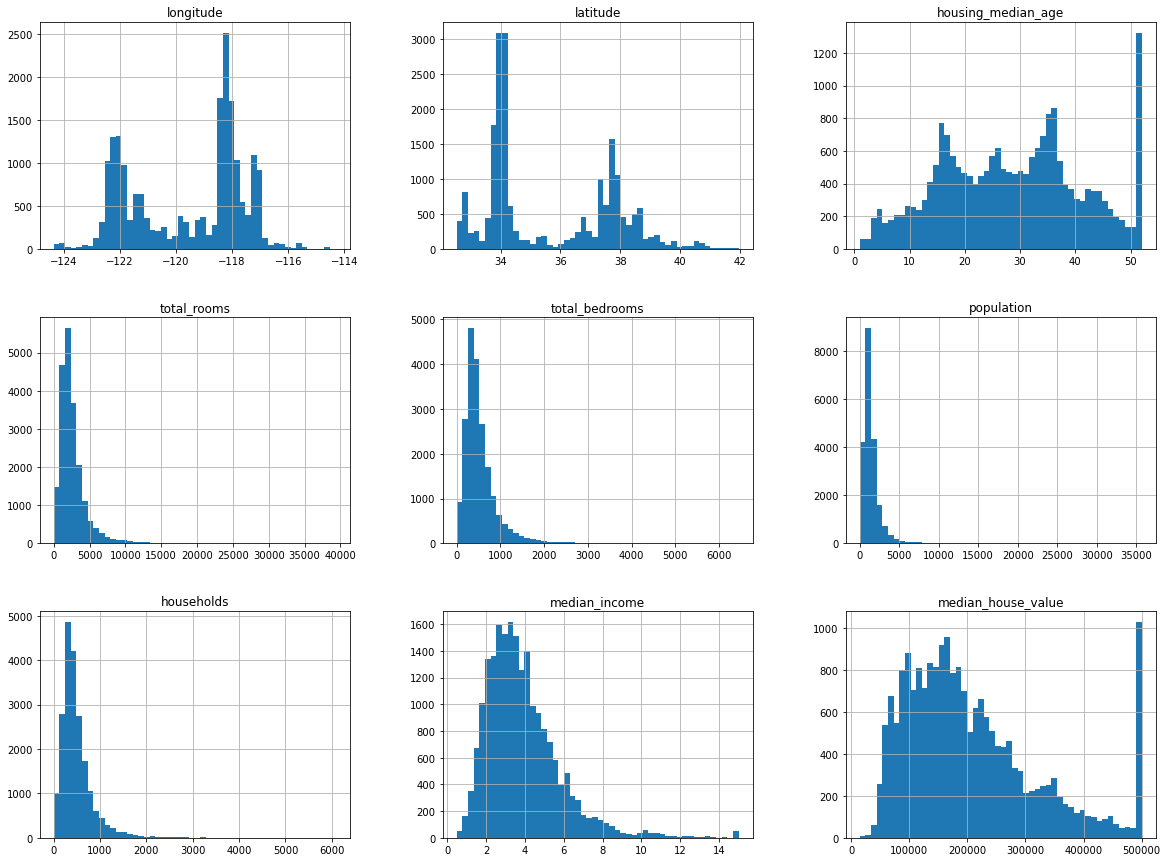

In [30]:
housing.hist(bins=50, figsize=(20, 15));

In [31]:
plt.rc?

Signature: plt.rc(group, **kwargs)
Docstring:
Set the current `.rcParams`.  *group* is the grouping for the rc, e.g.,
for ``lines.linewidth`` the group is ``lines``, for
``axes.facecolor``, the group is ``axes``, and so on.  Group may
also be a list or tuple of group names, e.g., (*xtick*, *ytick*).
*kwargs* is a dictionary attribute name/value pairs, e.g.,::

  rc('lines', linewidth=2, color='r')

sets the current `.rcParams` and is equivalent to::

  rcParams['lines.linewidth'] = 2
  rcParams['lines.color'] = 'r'

The following aliases are available to save typing for interactive users:

=====   =================
Alias   Property
=====   =================
'lw'    'linewidth'
'ls'    'linestyle'
'c'     'color'
'fc'    'facecolor'
'ec'    'edgecolor'
'mew'   'markeredgewidth'
'aa'    'antialiased'
=====   =================

Thus you could abbreviate the above call as::

      rc('lines', lw=2, c='r')

Note you can use python's kwargs dictionary facility to store
dictionaries of defaul

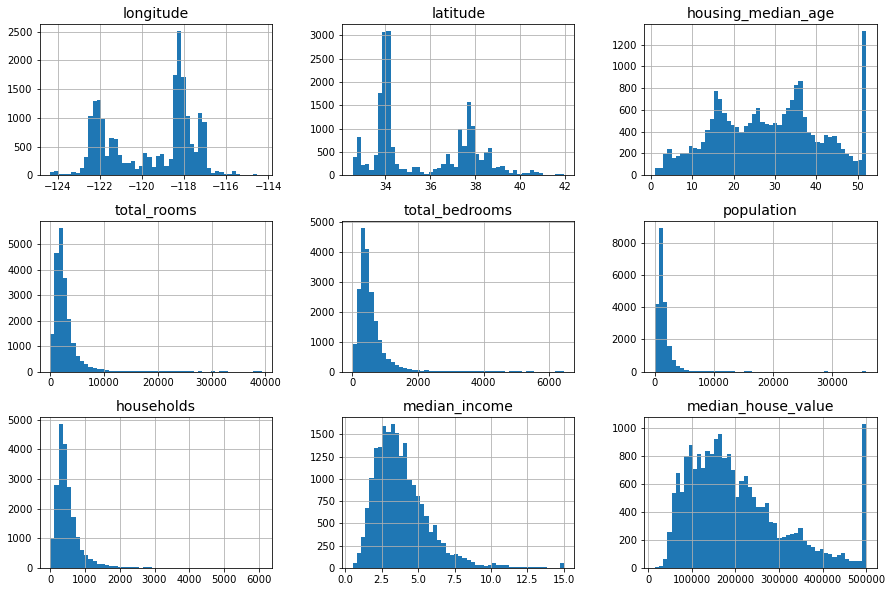

In [43]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(15,10));

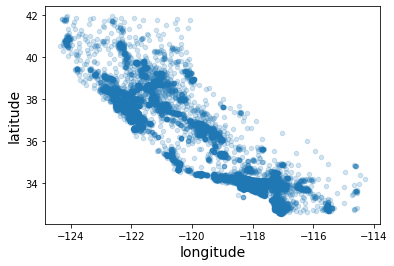

In [54]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2);

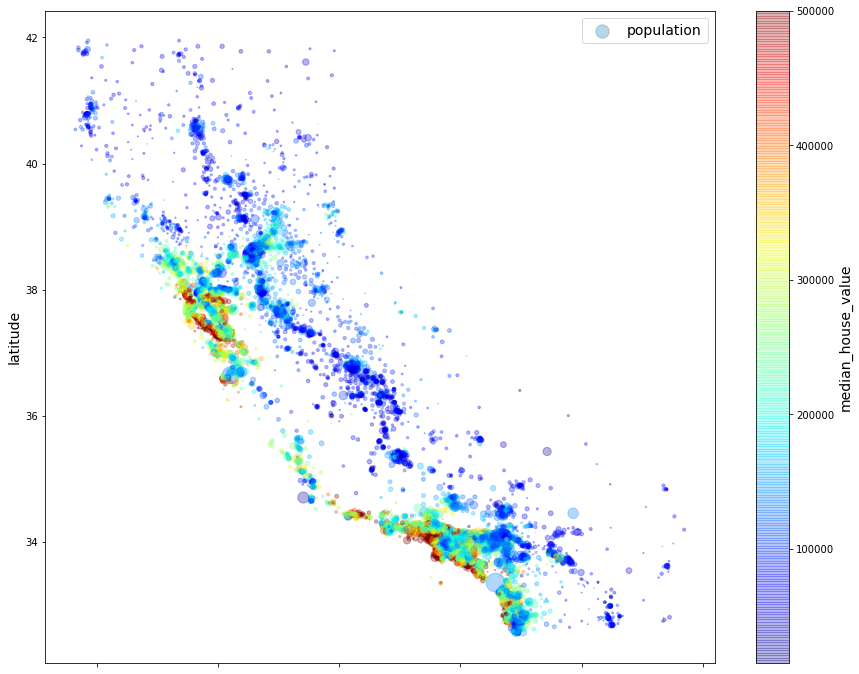

In [64]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             alpha=0.3,
             s=housing['population']/100,
             label='population',
             figsize=(15, 12),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)
plt.legend();

In [66]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


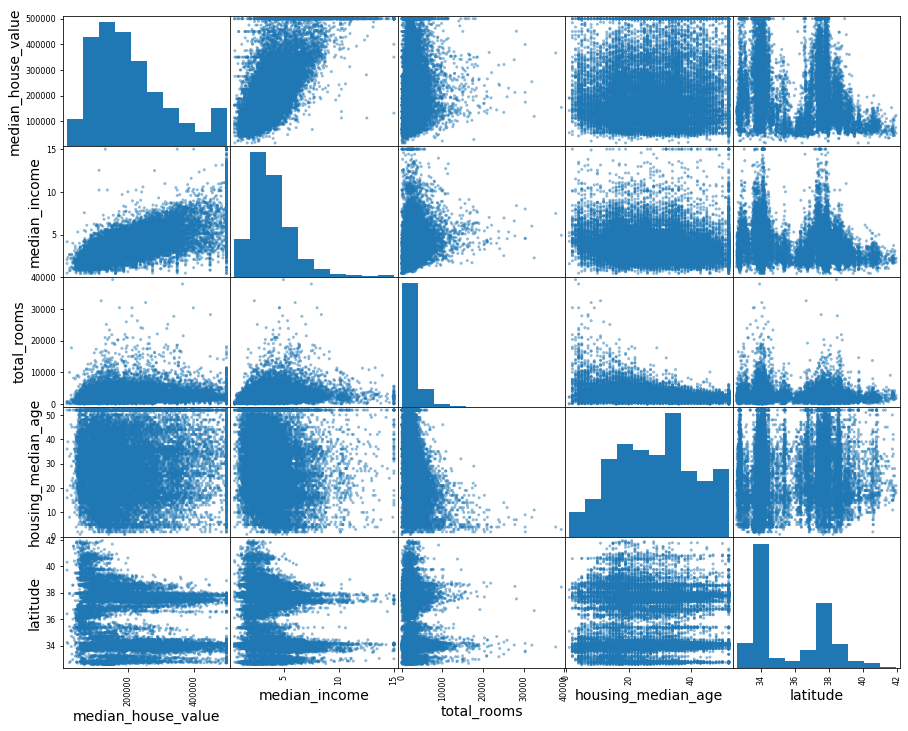

In [69]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'latitude']
pd.plotting.scatter_matrix(housing[attributes], figsize=(15, 12));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

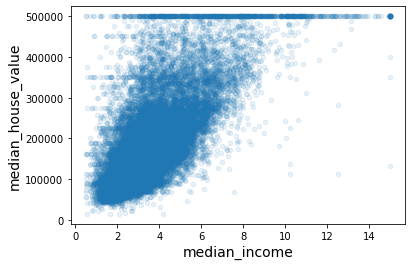

In [75]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [81]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False, key=abs)

median_house_value    1.000000
median_income         0.688075
bedrooms_ratio       -0.255880
rooms_per_house       0.151948
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
people_per_house     -0.023737
Name: median_house_value, dtype: float64

In [82]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  rooms_per_house     20640 non-null  float64
 11  bedrooms_ratio      20433 non-null  float64
 12  people_per_house    20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [47]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=12)

In [49]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [87]:
train_X = train_set.drop('median_house_value', axis=1)
train_y = train_set['median_house_value']

In [88]:
numeric_cols = train_X.select_dtypes(include=[np.number]).columns
category_cols = ['ocean_proximity']

In [101]:
imputer = SimpleImputer(strategy='median')

imputer.fit(train_X[numeric_cols])
housing_nbr_cols = pd.DataFrame(imputer.transform(train_X[numeric_cols]),
                                columns=numeric_cols,
                                index=train_X.index)
housing_nbr_cols

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1652,-122.34,37.95,38.0,1340.0,298.0,766.0,241.0,3.2833
14652,-117.08,33.08,23.0,3400.0,501.0,1383.0,488.0,4.9844
3548,-121.64,40.90,24.0,2237.0,434.0,834.0,318.0,1.7538
6730,-119.65,36.30,28.0,941.0,175.0,588.0,180.0,2.3466
18445,-119.02,36.07,29.0,2610.0,597.0,1659.0,571.0,1.5911
...,...,...,...,...,...,...,...,...
3714,-120.91,37.57,26.0,3396.0,705.0,2446.0,694.0,2.0521
7409,-118.09,34.11,36.0,2966.0,527.0,1231.0,482.0,4.6442
19709,-117.02,32.84,17.0,4013.0,673.0,2263.0,661.0,5.1310
5787,-117.11,32.73,27.0,3160.0,627.0,1628.0,612.0,3.8864


In [91]:
list(zip(numeric_cols, imputer.statistics_))

[('longitude', -118.51),
 ('latitude', 34.26),
 ('housing_median_age', 29.0),
 ('total_rooms', 2121.0),
 ('total_bedrooms', 433.0),
 ('population', 1166.0),
 ('households', 409.0),
 ('median_income', 3.5313)]

In [92]:
train_X.median().values

<ipython-input-92-27490032268c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_X.median().values


array([-118.51  ,   34.26  ,   29.    , 2121.    ,  433.    , 1166.    ,
        409.    ,    3.5313])

In [95]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(train_X[category_cols])
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [97]:
train_X[category_cols].head(10)

,ocean_proximity
1652,NEAR BAY
14652,<1H OCEAN
3548,INLAND
6730,INLAND
18445,INLAND
10052,INLAND
10536,INLAND
8976,INLAND
9999,INLAND
5218,INLAND


In [102]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [107]:
cat_encoder = OneHotEncoder()
housing_cat_onehot = pd.DataFrame(cat_encoder.fit_transform(train_X[category_cols]).toarray(),
                                  columns=cat_encoder.categories_,
                                  index=train_X.index)
housing_cat_onehot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1652,0.0,0.0,0.0,1.0,0.0
14652,1.0,0.0,0.0,0.0,0.0
3548,0.0,1.0,0.0,0.0,0.0
6730,0.0,1.0,0.0,0.0,0.0
18445,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
3714,0.0,1.0,0.0,0.0,0.0
7409,1.0,0.0,0.0,0.0,0.0
19709,1.0,0.0,0.0,0.0,0.0
5787,0.0,0.0,0.0,0.0,1.0
